# First plot 2D image

In [36]:
#import relevant libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

#### Read and check basic parameters of the PL spectra

In [37]:
test_spectrum = np.loadtxt('4.4K_Ga2O3_405cswlaser exc_visPL, 2s_600grating, cw745nm_p10_PLpolar 5mW exc0 coll0.csv',skiprows=0,delimiter=',')

In [38]:
test_spectrum.shape

(134000, 2)

In [39]:
#plt.plot(bkg[:1340, 0], bkg[:1340, 1])

In [40]:
hpixel = 1340 #the number of horizontal pixel number 
vpixel = 100 #the number of vertical pixel number 

data_check = np.zeros((hpixel, vpixel+1)) # 1 for using first column as wavelength cloumn

In [41]:
#data[:,0]=bkg[:1340,0] 
data_check[:,0] = test_spectrum[:1340,0]

In [42]:
for i in range(1,vpixel+1):
    data_check[:,i] = test_spectrum[hpixel*(i-1):hpixel*i,1] 

In [43]:
data_check.shape

(1340, 101)

In [44]:
pixel_roi_v = 16 # the pixel position of the vertical polarized PL
pixel_roi_h = 83 # the pixel position of the horizental polarized PL
bkg_pixel = 40  # background

In [45]:
specta_n = 19 # number of specta (or degree) which is checked
piexl_n_2average = 2 # number of pixels the average PL takes

data_pixel_v = np.zeros((hpixel,specta_n+1))
data_pixel_v[:,0] = data_check[:, 0]
data_pixel_h = np.zeros((hpixel,specta_n+1))
data_pixel_h[:,0] = data_check[:, 0]

for i in range(1, specta_n+1):
    test_spectrum = np.loadtxt('4.4K_Ga2O3_405cswlaser exc_visPL, 2s_600grating, cw745nm_p10_PLpolar 5mW exc0 coll'+repr((i-1)*10)+'.csv',skiprows=0,delimiter=',')
    for j in range(1,vpixel+1):
        data_check[:,j] = test_spectrum[hpixel*(j-1):hpixel*j,1]
        
    for k in range(0,piexl_n_2average):
        data_pixel_v[:,i] += data_check[:,pixel_roi_v+1+k]- data_check[:,bkg_pixel]  # the num 14 is the piexl we are interested in
        data_pixel_h[:,i] += data_check[:,pixel_roi_h+1+k]- data_check[:,bkg_pixel]  # the num 14 is the piexl we are interested in
    data_pixel_v[:,i] = data_pixel_v[:,i]/piexl_n_2average # since the first col is wavelength, pixel 12 is in col13
    data_pixel_h[:,i] = data_pixel_h[:,i]/piexl_n_2average # since the first col is wavelength, pixel 12 is in col13    

data_pixel_v.shape, data_pixel_h.shape

((1340, 20), (1340, 20))

In [46]:
offset = 10000

Text(0.5, 0, 'Energy (eV)')

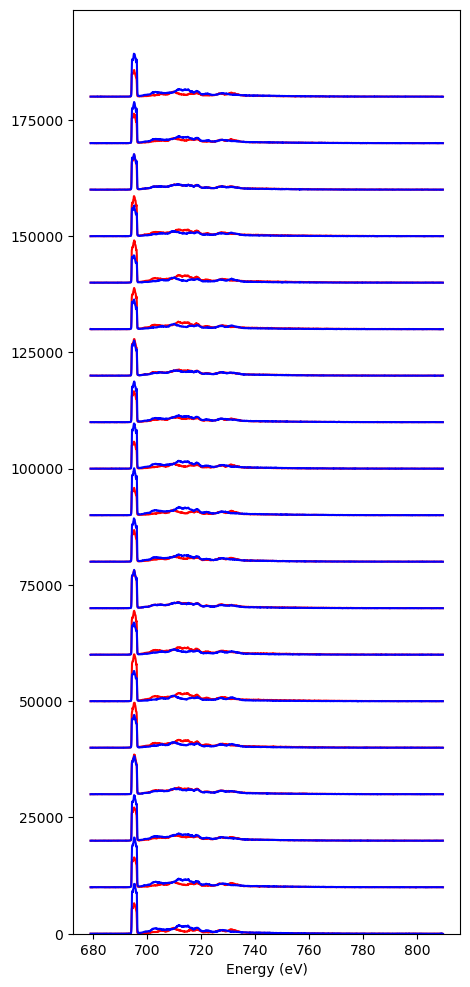

In [47]:
plt.figure(figsize=(5, 12))
plt.plot(data_pixel_v[:, 0], data_pixel_v[:, 1], 'r', data_pixel_h[:, 0], data_pixel_h[:, 1], 'b',
        data_pixel_v[:, 0], np.array(data_pixel_v[:, 2]) + offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 2]) + offset, 'b',
        data_pixel_v[:, 0], np.array(data_pixel_v[:, 3]) + 2*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 3]) + 2*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 4]) + 3*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 4]) + 3*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 5]) + 4*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 5]) + 4*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 6]) + 5*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 6]) + 5*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 7]) + 6*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 7]) + 6*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 8]) + 7*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 8]) + 7*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 9]) + 8*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 9]) + 8*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 10]) + 9*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 10]) + 9*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 11]) + 10*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 11]) + 10*offset, 'b',
        data_pixel_v[:, 0], np.array(data_pixel_v[:, 12]) + 11*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 12]) + 11*offset, 'b',
        data_pixel_v[:, 0], np.array(data_pixel_v[:, 13]) + 12*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 13]) + 12*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 14]) + 13*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 14]) + 13*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 15]) + 14*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 15]) + 14*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 16]) + 15*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 16]) + 15*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 17]) + 16*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 17]) + 16*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 18]) + 17*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 18]) + 17*offset, 'b',
         data_pixel_v[:, 0], np.array(data_pixel_v[:, 19]) + 18*offset, 'r', 
        data_pixel_h[:, 0], np.array(data_pixel_h[:, 19]) + 18*offset, 'b',         
        )
#plt.xlim(1.75, 2.15)
plt.ylim(0, )
plt.xlabel("Energy (eV)")

In [48]:
file_to_output = open('data_pixel_v'+str(pixel_roi_v)+'.txt', mode='w', newline='')
csv_writer = csv.writer(file_to_output, delimiter='\t')
csv_writer.writerows(data_pixel_v) 

In [49]:
file_to_output = open('data_pixel_h'+str(pixel_roi_h)+'.txt', mode='w', newline='')
csv_writer = csv.writer(file_to_output, delimiter='\t')
csv_writer.writerows(data_pixel_h) 

In [50]:
#data_pixel_v[16:83, 0]

# DLP calculation

In [51]:
df = pd.DataFrame({'x':data_pixel_h[:,0],'y':data_pixel_h[:,1]}) # since the first col is wavelength, pixel 12 is in col13
df.iplot(kind='line', x='x',y='y')

In [52]:
# start point and end point of spectrum range we are interested in
start = 693
end = 696

n_point = 0
for i in range(0, hpixel):
    if data_pixel_v[i, 0]>= start and data_pixel_v[i, 0] <=end:
        #print(data_pixel_v[i, 0])
                n_point += 1
        
n_point

30

In [53]:
angle_polar_step = 20 # real step for the step of polarization

data_pixel_dlp = np.zeros((specta_n, 6)) # 4 for S-polarization degree, 5 for Y-polarization degree, 
                                         # and 6 (last col) is the calculated DLP
data_pixel_dlp[:,0] = np.transpose([x for x in range(specta_n)]*np.array(angle_polar_step))

In [54]:
# Check if proper data exist, by changing error
for i in range(0, hpixel):
    if abs(data_pixel_v[i,0] - start) < 0.02: #0.01 needs to be ajusted everztime to get proper value
        print (abs(data_pixel_v[i,0] - start), data_pixel_v[i,0], start, i) 

0.013303649530939765 692.9866963504691 693 141


In [55]:
start_pixel = 141 # getting from upper check

In [56]:
# Calculted integrated PL intensity in interested energy range, 
# and keep them in col 2 and col3

for n in range(0, specta_n):
    for i in range(start_pixel, start_pixel+n_point): 
        # for data_pixel_v_dlp the first value start from 0, 
        # while for data_pixel_v the first pl intensity value start from 1st column, 
        #so we have spectra_n in for n in range(0, specta_n): and n+1 in data_pixel_v[i+j,n+1] 
        data_pixel_dlp[n,1] += data_pixel_v[i,n+1] 
        data_pixel_dlp[n,2] += data_pixel_h[i,n+1] 

In [57]:
# Calculate DLP, and put in col4
for i in range(0, specta_n):
    data_pixel_dlp[i,3] = data_pixel_dlp[i,1] / (data_pixel_dlp[i,1] + data_pixel_dlp[i,2]) #S-polarization degree
    data_pixel_dlp[i,4] = data_pixel_dlp[i,2] / (data_pixel_dlp[i,1] + data_pixel_dlp[i,2]) #Y-polarization degree
    data_pixel_dlp[i,5] = (data_pixel_dlp[i,1] - data_pixel_dlp[i,2]) / (data_pixel_dlp[i,1] + data_pixel_dlp[i,2])

In [58]:
data_pixel_dlp

array([[ 0.00000000e+00,  1.07883000e+05,  1.72809500e+05,
         3.84345859e-01,  6.15654141e-01, -2.31308282e-01],
       [ 2.00000000e+01,  1.07941000e+05,  1.72266500e+05,
         3.85218097e-01,  6.14781903e-01, -2.29563805e-01],
       [ 4.00000000e+01,  1.20792000e+05,  1.56805500e+05,
         4.35133602e-01,  5.64866398e-01, -1.29732797e-01],
       [ 6.00000000e+01,  1.41577500e+05,  1.31916500e+05,
         5.17662179e-01,  4.82337821e-01,  3.53243581e-02],
       [ 8.00000000e+01,  1.60295000e+05,  1.13339500e+05,
         5.85799671e-01,  4.14200329e-01,  1.71599341e-01],
       [ 1.00000000e+02,  1.65738000e+05,  1.04813500e+05,
         6.12593166e-01,  3.87406834e-01,  2.25186332e-01],
       [ 1.20000000e+02,  1.54995000e+05,  1.12110000e+05,
         5.80277419e-01,  4.19722581e-01,  1.60554838e-01],
       [ 1.40000000e+02,  1.33470000e+05,  1.30215500e+05,
         5.06171177e-01,  4.93828823e-01,  1.23423548e-02],
       [ 1.60000000e+02,  1.11732500e+05,  1.494

In [59]:
file_to_output = open('data_pixel_DLP.txt', mode='w', newline='')
csv_writer = csv.writer(file_to_output, delimiter='\t')
csv_writer.writerows(data_pixel_dlp) 

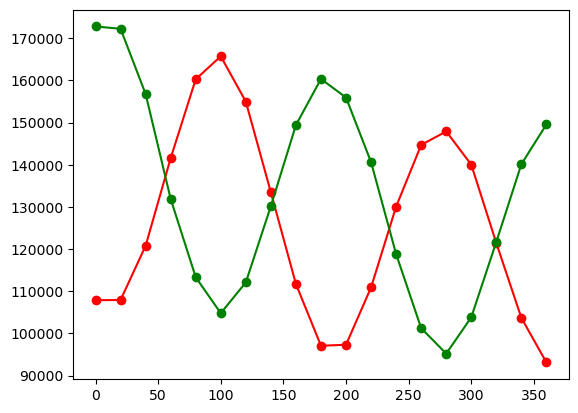

In [60]:
plt.plot(data_pixel_dlp[:,0], data_pixel_dlp[:,1], 'ro-', data_pixel_dlp[:,0], data_pixel_dlp[:,2], 'g-o')

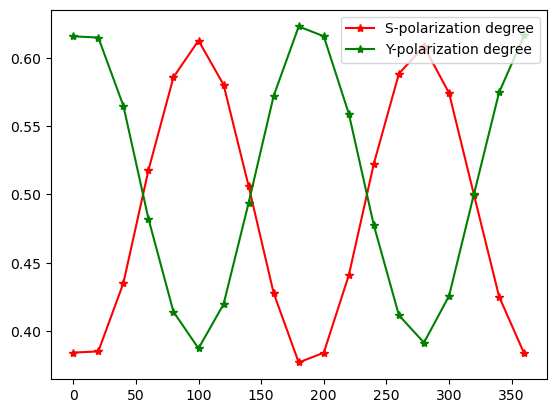

In [61]:
plt.plot(data_pixel_dlp[:,0], data_pixel_dlp[:,3], 'r*-', label='S-polarization degree') 
plt.plot(data_pixel_dlp[:,0], data_pixel_dlp[:,4], 'g*-', label='Y-polarization degree')
plt.legend()

## Do polar plot

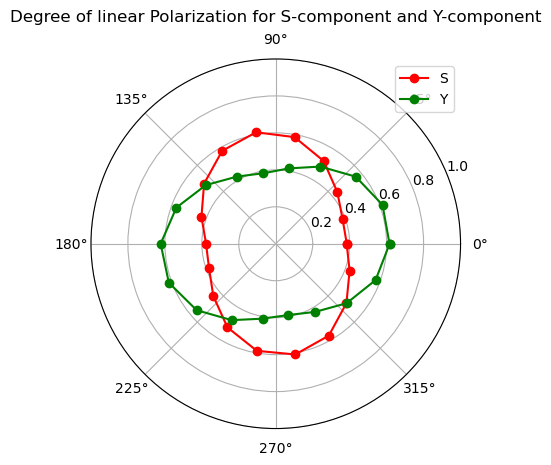

In [62]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(data_pixel_dlp[:,0]/180*np.pi, data_pixel_dlp[:,3], "ro-",label='S')
ax.plot(data_pixel_dlp[:,0]/180*np.pi, data_pixel_dlp[:,4], "go-", label='Y')
ax.set_rmax(1)
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)
plt.legend()
ax.set_title("Degree of linear Polarization for S-component and Y-component", va='bottom')
plt.show()

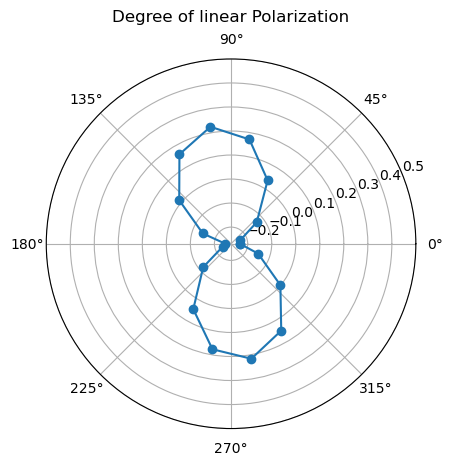

In [63]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
#ax.plot(data_pixel_dlp[:,0], data_pixel_dlp[:,3], "o")
ax.plot(data_pixel_dlp[:,0]/180*np.pi, data_pixel_dlp[:,5], "o-")
ax.set_rmax(0.5)
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.grid(True)

ax.set_title("Degree of linear Polarization", va='bottom')
plt.show()

In [64]:
from scipy.optimize import curve_fit

def polar_func(x,a,b,c):
    
    return a+b*(np.sin(x-c))**2

x = data_pixel_dlp[:,0]/180*np.pi
y = data_pixel_dlp[:,5]

init_vals = [0.4, 0.2, 0.2]  # for [a, b, c]
best_vals, covar = curve_fit(polar_func, x, y, p0=init_vals, maxfev=5000000)
print('best_vals: {}'.format(best_vals))

best_vals: [-0.25010261  0.46901281  0.1422577 ]


In [65]:
x1 = np.linspace(0, 360,360)/180*np.pi

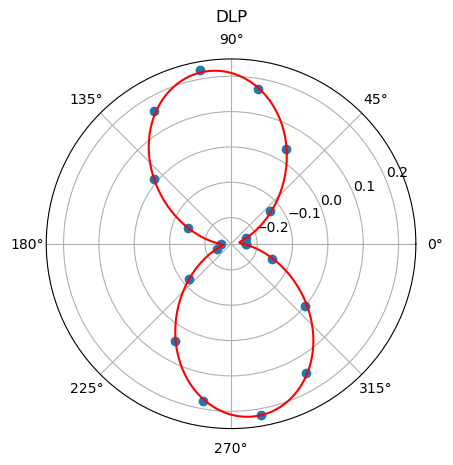

In [66]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(data_pixel_dlp[:,0]/180*np.pi, data_pixel_dlp[:,5], "o", x1, polar_func(x1, *best_vals), 'r-')
#ax.set_rmax(1)
ax.set_title("DLP", va='bottom')
plt.show()